# Homework 3: Optimization, KNN and Decision Trees
by Rachel Manzelli and Brian Kulis

## Setup

To run and solve this assignment, you must have access to a working Jupyter Notebook installation. We recommend Google Colab. If you are already familiar with Jupyter and have your own installation, you may use it; however, you will have to tweak Colab-specific commands we've entered here (for example, file uploads).

To use Google Colab:

1. Download this `ipynb` file.
2. Navigate to https://colab.research.google.com/ and select `Upload` in the pop-up window.
3. Upload this file. It will then open in Colab.

The below statements assume that you have already followed these instructions. If you need help with Python syntax, NumPy, or Matplotlib, you might find Week 1 discussion material useful.

To run code in a cell or to render Markdown+LaTeX press Ctrl+Enter or "`Run`" button above. To edit any code or text cell, double-click on its content. Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. You can add cells via `+` sign at the top left corner.

**Submission instructions**: please upload your completed solution file as well as a scan of any handwritten answers to Gradescope by **February 24th at midnight**..

### 1. Maximum Likelihood without a Closed-Form Solution

Assume that we are given $n$ IID samples ${x_1,...x_n}$ from the following $P(X|\theta)$:

$$P(X|\theta) = \frac{1}{\pi}\bigg [\frac{1}{(x-\theta)^2+1}\bigg ]$$

#### 1.a. Try to compute the MLE via maximizing the log-likelihood function directly, and briefly explain why this won't work.

#### Solution

This is the Cauchy distribution, with $\gamma = 1$. Following the steps to obtain the ML estimate for $\theta$:

$$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} P(x_1,...x_n|\theta)$$

$$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} \prod_{i=1}^{n}P(x_i|\theta) \mbox{ (since $x_i$ are IID)}$$

$$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} \prod_{i=1}^{n}\bigg (\frac{1}{\pi}\bigg [\frac{1}{(x_i-\theta)^2+1}\bigg ]\bigg ) \mbox{ This is the likelihood function.}$$

$$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} \log\bigg (\prod_{i=1}^{n}\bigg (\frac{1}{\pi}\bigg [\frac{1}{(x_i-\theta)^2+1}\bigg ]\bigg )\bigg ) \mbox{(take the log to obtain the log-likelihood function)}$$

$$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} \log\prod_{i=1}^{n}\bigg (\frac{1}{\pi}\bigg ) + \log\prod_{i=1}^{n}\bigg (\bigg [\frac{1}{(x_i-\theta)^2+1}\bigg ]\bigg )\bigg ) \mbox{ (log(xy) = log(x) + log(y))}$$

$$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} -\log\prod_{i=1}^{n}(\pi) - \log\prod_{i=1}^{n}((x_i-\theta)^2+1) \mbox{ (flipped the fraction and negated the log)}$$

$$MLE(\theta) = \underset{\theta}{\operatorname{argmax}} -n\log\pi - \sum_{i=1}^{n}\log((x_i-\theta)^2+1) \mbox{ (log product rule) This is the log-likelihood function.}$$

$$\frac{d}{d\theta}\bigg [-nlog\pi - \sum_{i=1}^{n}log((x_i-\theta)^2+1)\bigg ] = 0 \mbox{ (take the derivative w.r.t $\theta$ and set to 0)}$$

$$\frac{d}{d\theta}\bigg [-\sum_{i=1}^{n}log((x_i-\theta)^2+1)\bigg ] = 0 \mbox{ (remove terms not dependent on $\theta$)}$$

$$\sum_{i=1}^{n}\frac{2(x_i-\theta)}{(x_i-\theta)^2+1} = 0 \mbox{ (simplify)}$$

$$\frac{2(x_1-\theta)}{(x_1-\theta)^2+1} + \frac{2(x_2-\theta)}{(x_2-\theta)^2+1} + ... + \frac{2(x_n-\theta)}{(x_n-\theta)^2+1} = 0$$

It would be very hard to solve for $\theta$ directly here, since we'd have to find the root of a polynomial with degree $2n-1$.

#### 1.b. Convert the objective (log-likelihood) function into a cost function, $J(\theta)$, that we can minimize using gradient descent.

**Solution**

$LL(\theta) = -nlog\pi - \sum_{i=1}^{n}\log((x_i-\theta)^2+1)$ (we'd like to maximize this)

$J(\theta) = -LL(\theta) = -[-n\log\pi - \sum_{i=1}^{n}\log((x_i-\theta)^2+1)]$ (we'd like to minimize this, averaged over all training examples)

$J(\theta) = \log\pi + \frac{1}{n}[\sum_{i=1}^{n}\log((x_i-\theta)^2+1)]$ (simplify)

#### 1.c. Compute the gradient descent update rule, where $\theta_{n+1}=\theta_n - \alpha\frac{d}{d\theta_n}J(\theta_n)$.

**Solution**

$$\theta_{n+1}=\theta_n - \alpha*\frac{1}{n}\sum_{i=1}^{n}\bigg [\frac{2(\theta_n-x_i)}{(x_i-\theta_n)^2+1}\bigg ]$$

#### 1.d. Write the pseudocode for gradient descent with this update rule.

**Solution**

`for i in num_iters, or repeat until convergence:`

$$\theta_{n+1}=\theta_n - \alpha*\frac{1}{n}\sum_{i=1}^{n}\bigg [\frac{2(\theta_n-x_i)}{(x_i-\theta_n)^2+1}\bigg ]$$

#### 1.e. (Bonus) Compute the stochastic gradient descent (SGD) update rule, and write pseudocode for SGD with this update rule. (Assume a mini-batch size of 1.)

**Solution: SGD update rule**

$$\theta_{n+1}=\theta_n - \alpha\bigg [\frac{2(\theta_n-x)}{(x-\theta_n)^2+1}\bigg ]$$

**Solution: SGD pseudocode (batch size 1)**

`for i in num_iters, or repeat until convergence:`

>`for x in X_train:`
    
$$\theta_{n+1}=\theta_n - \alpha\bigg [\frac{2(\theta_n-x)}{(x-\theta_n)^2+1}\bigg ]$$

### 2. Decision Trees

The following dataset contains information about different weather attributes, along with whether the golf team decided to play. Each row represents the characteristics of one day.


| Temp        | Humidity    | Wind        | Play?       |
| ----------- | ----------- | ----------- | ----------- |
| hot         | normal      | strong      | no          |
| mild        | high        | strong      | yes         |
| hot         | normal      | strong      | no          |
| hot         | normal      | weak        | yes         |
| mild        | normal      | strong      | yes         |


We will construct a decision tree that predicts whether or not the current weather attributes are appropriate for playing golf.

#### 2.a. Choose a root node. 
Follow the method of using information gain to choose a root node for our decision tree, as described in class (and posted in the slides on Blackboard).

**Solution**

The root node is the node with the highest information gain. We'll calculate this by the following formula:

$Gain(S,F) = Entropy(S) - \sum_{v\in values(F)}\frac{\left|S_v\right|}{\left|S\right|}Entropy(S_v)$, where $S_v$ is the subset of $S$ having value $v$ for feature $F$, and $Entropy = -p_1\log_2 p_1 - p_0\log_2 p_0$, where $p_1$ is the fraction of positive examples in the subset, and $p_0$ is that of negative examples.

***Total dataset entropy, $Entropy(S)$***

$Entropy(S) = -P(yes)\log_{2} P(yes) - P(no)\log_{2} P(no) = -\frac{3}{5}\log_{2}\frac{3}{5} - \frac{2}{5}\log_{2}\frac{2}{5} = 0.971$

***Temperature***

$Gain(S, T) = Entropy(S) - \sum_{v\in values(T)}\frac{\left|S_v\right|}{\left|S\right|}Entropy(S_v)$

$Gain(S, T) = Entropy(S) - \bigg [\frac{\left|S_{hot}\right|}{\left|S\right|}Entropy(S_{hot}) + \frac{\left|S_{mild}\right|}{\left|S\right|}Entropy(S_{mild})\bigg ]$

$Gain(S, T) = 0.971 - \bigg [\frac{3}{5}(-\frac{1}{3}\log_2\frac{1}{3} - \frac{2}{3}\log_2\frac{2}{3}) + \frac{2}{5}(-\frac{0}{2}\log_2\frac{0}{2} - \frac{2}{2}\log_2\frac{2}{2})\bigg ]$

$Gain(S, T) = 0.971 - \bigg [\frac{3}{5}(0.918) + \frac{2}{5}(0)\bigg ] = 0.971 - 0.551$

$Gain(S, T) = 0.42$

***Humidity***

$Gain(S, H) = Entropy(S) - \sum_{v\in values(H)}\frac{\left|S_v\right|}{\left|S\right|}Entropy(S_v)$

$Gain(S, H) = Entropy(S) - \bigg [\frac{\left|S_{high}\right|}{\left|S\right|}Entropy(S_{high}) + \frac{\left|S_{normal}\right|}{\left|S\right|}Entropy(S_{normal})\bigg ]$

$Gain(S, H) = 0.971 - \bigg [\frac{1}{5}(-\frac{1}{1}\log_2\frac{1}{1} - \frac{0}{1}\log_2\frac{0}{1}) + \frac{4}{5}(-\frac{2}{4}\log_2\frac{2}{4} - \frac{2}{4}\log_2\frac{2}{4})\bigg ]$

$Gain(S, H) = 0.971 - \bigg [\frac{1}{5}(0) + \frac{4}{5}(1)\bigg ] = 0.971 - 0.8$

$Gain(S, H) = 0.171$

***Wind***

$Gain(S, W) = Entropy(S) - \sum_{v\in values(W)}\frac{\left|S_v\right|}{\left|S\right|}Entropy(S_v)$

$Gain(S, W) = Entropy(S) - \bigg [\frac{\left|S_{strong}\right|}{\left|S\right|}Entropy(S_{strong}) + \frac{\left|S_{weak}\right|}{\left|S\right|}Entropy(S_{weak})\bigg ]$

$Gain(S, W) = 0.971 - \bigg [\frac{4}{5}(-\frac{2}{4}\log_2\frac{2}{4} - \frac{2}{4}\log_2\frac{2}{4}) + \frac{1}{5}(-\frac{1}{1}\log_2\frac{1}{1} - \frac{0}{1}\log_2\frac{0}{1})\bigg ]$

$Gain(S, W) = 0.971 - \bigg [\frac{4}{5}(1) + \frac{1}{5}(0)\bigg ] = 0.971 - 0.8$

$Gain(S, W) = 0.171$

Since temperature has the highest information gain, we'll use **temperature as the root node** to make our first split.

#### 2.b. Complete the tree.
Repeat the method of using information gain to split on another feature, as described in class (and posted in the slides on Blackboard).

Since our decision tree will always decide to play golf when the temperature is `mild`, we'll remove those samples from our dataset for our next split. We're left with the following:

| Temp        | Humidity    | Wind        | Play?       |
| ----------- | ----------- | ----------- | ----------- |
| hot         | normal      | strong      | no          |
| hot         | normal      | strong      | no          |
| hot         | normal      | weak        | yes         |

We'll choose the next (and final) feature by repeating our search for the highest information gain, adjusting our calculations to only include the remaining samples.

***Total dataset entropy, $Entropy(S)$***

$Entropy(S) = -P(yes)\log_{2} P(yes) - P(no)\log_{2} P(no) = -\frac{1}{3}\log_{2}\frac{1}{3} - \frac{2}{3}\log_{2}\frac{2}{3} = 0.918$

***Humidity***

$Gain(S, H) = Entropy(S) - \sum_{v\in values(H)}\frac{\left|S_v\right|}{\left|S\right|}Entropy(S_v)$

$Gain(S, H) = Entropy(S) - \bigg [\frac{\left|S_{high}\right|}{\left|S\right|}Entropy(S_{high}) + \frac{\left|S_{normal}\right|}{\left|S\right|}Entropy(S_{normal})\bigg ]$

$Gain(S, H) = 0.918 - \bigg [0 + \frac{3}{3}(-\frac{2}{3}\log_2\frac{2}{3} - \frac{1}{3}\log_2\frac{1}{3})\bigg ]$

$Gain(S, H) = 0.918 - 0.918$

$Gain(S, H) = 0$

***Wind***

$Gain(S, W) = Entropy(S) - \sum_{v\in values(W)}\frac{\left|S_v\right|}{\left|S\right|}Entropy(S_v)$

$Gain(S, W) = Entropy(S) - \bigg [\frac{\left|S_{strong}\right|}{\left|S\right|}Entropy(S_{strong}) + \frac{\left|S_{weak}\right|}{\left|S\right|}Entropy(S_{weak})\bigg ]$

$Gain(S, W) = 0.918 - \bigg [\frac{2}{3}(-\frac{0}{2}\log_2\frac{0}{2} - \frac{2}{2}\log_2\frac{2}{2}) + \frac{1}{3}(-\frac{1}{1}\log_2\frac{1}{1} - \frac{0}{1}\log_2\frac{0}{1})\bigg ]$

$Gain(S, W) = 0.918 - \bigg [\frac{2}{3}(0) + \frac{1}{3}(0)\bigg ] = 0.918 - 0$

$Gain(S, W) = 0.918$

Wind has the highest information gain, so we'll now **split on wind**.

***Final tree:***

![Final Tree](decision_tree_golf.png)

### 3. K-Nearest Neighbors on NIST

We're going to build a K-nearest neighbors classifier from scratch, including validating for the best K, and test it out on NIST, a handwritten digits dataset.

The 64 features of this dataset are the values of each pixel in the 8x8 image grid of one handwritten digit, where the digits are written in white (pixel value 255) and the surrounding space is black (pixel value 0). Each sample represents one image.

#### First, install the latest release of `sklearn`.

In [ ]:
# These datasets require the latest release of sklearn (0.24.1).
# We are going to uninstall the default Colab version (if you are using Colab) or your current version, and install version 0.24.1.
# AFTER RUNNING THIS CELL, YOU WILL NEED TO RESTART THE RUNTIME. GO TO Runtime/Kernel -> Restart Runtime to do this. 
# (Or, in Colab, hit the RESTART RUNTIME button at the bottom of the error message when you run this cell.)
# You only need to do this once, but if the Colab runtime disconnects, you will need to do it again!

!pip uninstall scikit-learn -y
!pip install scikit-learn==0.24.1

Found existing installation: scikit-learn 0.23.1
Uninstalling scikit-learn-0.23.1:
  Successfully uninstalled scikit-learn-0.23.1
  Using cached scikit_learn-0.24.1-cp37-cp37m-macosx_10_13_x86_64.whl (7.2 MB)
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.


#### Import the data and take a look at some samples.

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits

# Import the data into a pandas dataframe
nist = load_digits()
nist_df = pd.DataFrame(nist.data, columns = nist.feature_names)

# Split data into features and labels
X = nist.data
y = nist.target

# View the raw data
nist_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


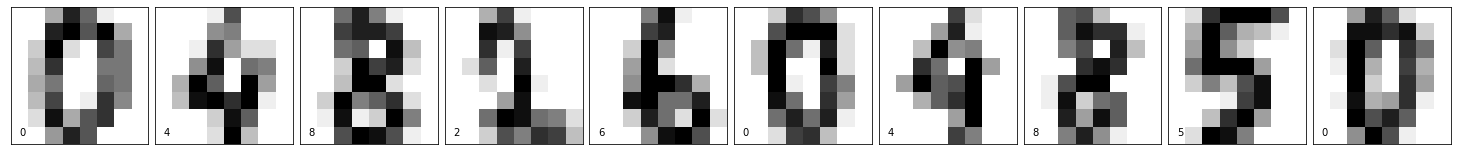

In [ ]:
# Visualize 10 random samples as 8x8 images
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(nist.images[i*4], cmap=plt.cm.binary, interpolation='nearest')
    # Label the image with the target value
    ax.text(0, 7, str(nist.target[i*4]))

#### 3.a. Split the data into train, test, and validation sets.

Use a 60/20/20 split. Make sure to set `random_state=42` to shuffle the dataset in a consistent manner.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training, test, and validation sets, just like we did on HW 2
# Make sure to set random_state=42!
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True, random_state=42, test_size=0.25)

#### 3.b. Implement a Euclidean distance function.
We'll need to calculate the Euclidean distance between points of arbitrary dimensions, which you'll implement by filling in the function below. (*Hint: use [this](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html).*)

In [ ]:
from scipy.spatial import distance

def euclidean_distance(a, b):
    '''
    A function that calculates and returns the Euclidean distance between vectors a and b.
    '''
    dist = distance.euclidean(a, b)
    return dist

#### 3.c. Implement the K-nearest neighbors algorithm.
The two functions below make up a skeleton of the KNN algorithm, which you will complete.

The first, `compute_neighbors_and_classify()`:
1. Computes the neighbors given `k` (the number of neighbors)
2. Finds the `k` neighbors with the smallest Euclidean distance to the test point (using `euclidean_distance()` above)
3. Returns the most common classification label among those `k` neighbors.

The second, `compute_accuracy_on_dataset()`:
1. Gets the KNN classification predictions for each test point using `compute_neighbors_and_classify()`.
2. Compares the predictions to the real values.
3. Returns the accuracy score (how many predictions the model got right divided by total number of samples).

In [ ]:
from scipy.stats import mode

def compute_neighbors_and_classify(X_train, y_train, test_point, k):
    '''
    A function that computes the k neighbors in X_train closest to one test point, 
    and returns the classification.
    '''
    # This is a list to hold all of the distances associated with the points and their labels
    distances = []
    # Loop over the training points
    for i, train_point in enumerate(X_train):
        # Compute the Euclidean distance `dist` from this training point to the test point
        dist = euclidean_distance(train_point, test_point)
        # Add the distance, the point, and its label (as a tuple) value to our list
        # We use a tuple so we can sort the list later while keeping each neighbor next to its distance
        distances.append((dist, train_point, y_train[i]))

    # Now that we have all the distances, we need to return the labels with the k smallest distances
    # First, sort the list we made by distance
    distances = sorted(distances, key=lambda x: x[0])
    
    # Now, pull out the labels associated with the first k neighbors and add them to a list
    k_labels = []
    for i in range(k):
        k_labels.append(distances[i][2])
    
    # Get the label that appears the most times in k_labels using mode(). This is our `classification`.
    # If there is no mode, just return any label within the k_labels list.
    classification = mode(k_labels)[0]
    if not classification:
        return k_labels[0]
    else:
        return classification


def compute_accuracy_on_dataset(X_train, y_train, data, labels, k):
    '''
    A function that computes the accuracy of KNN on a (test) dataset.
    '''
    accuracy_numerator = 0
    # Loop over the dataset we'd like to get the accuracy on
    for i, point in enumerate(data):
        # Compute the neighbors and classification for this point with the training data
        classification = compute_neighbors_and_classify(X_train, y_train, point, k)
        # Compare this classification to the real value in `labels`. 
        # If the model got it correct, add to a running sum of correct predictions.
        accuracy_numerator += 1 if classification == labels[i] else 0
    
    # Compute the accuracy: divide the count of correct predictions by the number of samples in the dataset
    accuracy = accuracy_numerator / len(labels)
    
    return accuracy

#### 3.d. Run KNN on the NIST dataset with k = 1, and report the accuracy on the test set.

In [ ]:
# Call compute_accuracy_on_dataset() to get the accuracy on the test set with k=1
knn_acc = compute_accuracy_on_dataset(X_train, y_train, X_test, y_test, 1)
print("Accuracy on test set with k = 1:", knn_acc)

Accuracy on test set with k = 1: 0.9777777777777777


#### 3.d. Find the best value of K by using the validation set.
Ideally, we'd like to programmatically find the best value of `k` instead of just guessing what it is. Using the **validation set**, find the best value of `k` by running our KNN algorithm for `k = [1, 2, 3 ... 10]`, and saving the `k` with the best accuracy. 

Fill in the function below, and then call it to achieve this.

In [ ]:
def validate_k_on_dataset(X_train, y_train, X_val, y_val):
    '''
    A function that finds the best K using a (validation) dataset.
    '''
    # Initialize the best accuracy and associated k
    best_knn_acc = 0
    best_k = 0
    # In Python, range doesn't include the last element; this is the list [1,2,...10]
    k_vec = list(range(1, 11))
    # Loop through each k
    for i in k_vec:
        # Compute the accuracy on the validation set using the current k
        knn_acc = compute_accuracy_on_dataset(X_train, y_train, X_val, y_val, i)
        # If this k is better, replace the current best accuracy and k
        if knn_acc > best_knn_acc:
            best_knn_acc = knn_acc
            best_k = i
            
    return best_knn_acc, best_k

In [ ]:
# Call the above function and print the resulting accuracy and best k for the validation set
best_knn_acc, best_k = validate_k_on_dataset(X_train, y_train, X_val, y_val)
print("Best accuracy on validation set was", best_knn_acc, "with k =", best_k)

Best accuracy on validation set was 0.9944444444444445 with k = 3


#### 3.e. Merge the training and validation sets, and report the new test accuracy using the best `k`.
Since we've already used the validation set to obtain the best `k`, we can now merge the training set and the validation set and recompute KNN on the test set with the best `k`. 

Make sure to merge the data points in the same order that you merge the labels!

##### Merge the training and validation sets. *(Hint*: Use [np.vstack](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) and [np.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).)

In [ ]:
import numpy as np 

# Use np.vstack to stack X_train and X_val
X_val_and_train = np.vstack((X_val, X_train))

# Use np.concatenate to concatenate y_train and y_val
y_val_and_train = np.concatenate((y_val, y_train))

###### Now, recompute the accuracy on the test set using this merged dataset (instead of just the training set) and the best `k` value.

In [ ]:
# Compute the accuracy on the test set using the merged train and validation set and the best k
knn_acc = compute_accuracy_on_dataset(X_val_and_train, y_val_and_train, X_test, y_test, best_k)
print("KNN accuracy on test set using merged train and validation sets and best K value:", knn_acc)

KNN accuracy on test set using merged train and validation sets and best K value: 0.9833333333333333


### 4. Comparing Decision Trees and K-Nearest Neighbors on Raw Wine Data
We're going to compare the performance of our KNN algorithm and the decision tree algorithm on a new dataset.

The wine dataset is the result of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are 13 different measurements (features) taken for different constituents found in the three types of wine.

#### Import the wine dataset and view it.

In [ ]:
from sklearn.datasets import load_wine

# Import the data into a pandas dataframe
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)

# Split data into features and labels
X_w = wine.data
y_w = wine.target

# View the raw data
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#### 4.a. Split the data into train, test and validation sets.

Use a 60/20/20 split. Make sure to set `random_state=42` to shuffle the dataset in a consistent manner.

In [ ]:
# Split the data into training, test, and validation sets, just like we did on HW 2
# Make sure to set random_state=42!
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w, y_w, shuffle=True, random_state=42, test_size=0.2)
X_w_train, X_w_val, y_w_train, y_w_val = train_test_split(X_w_train, y_w_train, shuffle=True, random_state=42, test_size=0.25)

#### 4.b. KNN: Find the best `k` and accuracy for this dataset.
Use the same process as in question 3 to:

##### 1. Validate `k`.

In [ ]:
# Call validate_k_on_dataset() and print the resulting accuracy and best k for the validation set
best_w_knn_acc, best_w_k = validate_k_on_dataset(X_w_train, y_w_train, X_w_val, y_w_val)
print("Best accuracy on validation set was", best_w_knn_acc, "with k =", best_w_k)

Best accuracy on validation set was 0.8055555555555556 with k = 4


##### 2. Merge the training and validation sets.

In [ ]:
# Use np.vstack to stack X_train and X_val
X_w_val_and_train = np.vstack((X_w_val, X_w_train))

# Use np.concatenate to concatenate y_train and y_val
y_w_val_and_train = np.concatenate((y_w_val, y_w_train))

##### 3. Report the new accuracy on the test set; recompute KNN using the merged dataset and the best `k` value.

In [ ]:
# Compute the accuracy on the test set using the merged train and validation set and the best k
w_knn_acc = compute_accuracy_on_dataset(X_w_val_and_train, y_w_val_and_train, X_w_test, y_w_test, best_w_k)
print("KNN accuracy on test set using merged train and validation sets and best K value:", w_knn_acc)

KNN accuracy on test set using merged train and validation sets and best K value: 0.75


#### 4.c. Decision Trees: Use `sklearn`'s built-in decision tree on this dataset and report the accuracy.
You can find the documentation for instantiating and fitting `sklearn`'s `DecisionTreeClassifier` [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

You can find the documentation for using `metrics.accuracy_score` to compute the accuracy given predictions and true labels [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

*Make sure to use the merged training and validation set to fit the decision tree (for a fair comparison to KNN)!*

In [ ]:
from sklearn import tree
from sklearn import metrics

# Instantiate the decision tree.
my_tree = tree.DecisionTreeClassifier()

# Fit the tree with the merged training and validation set.
my_tree.fit(X_w_val_and_train, y_w_val_and_train)

# Use the tree to predict on the test set.
my_treepred = my_tree.predict(X_w_test)

# Use metrics.accuracy_score to get the accuracy of this decision tree on the merged validation and testing set.
tree_acc = metrics.accuracy_score(y_w_test, my_treepred)

print("Decision tree accuracy on test set:", tree_acc)

Decision tree accuracy on test set: 0.9444444444444444


#### 4.d. Explain the difference in performance between these two algorithms; why does one perform better than the other?

**Solution**

KNN performs worse on the wine dataset than the decision tree. 

KNN performs better when the data is normalized (where the features have approximately the same scale). In the case that the data is not normalized, the features that have smaller values may become uninformative, and the algorithm will essentially rely on the dimension(s) whose values are substantially larger (due to the distance metric). 

In this case, the wine dataset has one particular feature (Proline) that is ~1000x larger than all the other features. This is the probable reason KNN performs poorly on this dataset as opposed to the NIST dataset - its distance metric does not accurately represent how different certain samples are, since it is relying largely on the Proline feature.